In [1]:
import numpy as np #Numerik işlemler için kütüphane
import matplotlib.pyplot as plt #Görsel grafikler için kütüphane
import keras #Makine öğrenmesi ve model eğitimi için kullanılabilir.
import tensorflow as tf #Makine öğrenmesi ve model eğitimi için kullanılabilir.
from tensorflow.keras.utils import to_categorical #Model eğitiminde kayıp parametresi kütüphanesi
from numpy import genfromtxt #Dosya işlemleri için


In [2]:
#Toplanmış test verisi ile
test_verisi = genfromtxt('C:/Users/abdullahfurkan/Desktop/datalar/yeni_test/mnist_test_yeni.csv', delimiter=',')
egitim_verisi = genfromtxt('C:/Users/abdullahfurkan/Desktop/datalar/yeni_test/mnist_train.csv', delimiter=',')

In [ ]:
#Orjinal veriler ile
test_verisi = genfromtxt('C:/Users/abdullahfurkan/Desktop/datalar/asil/mnist_test.csv', delimiter=',')
egitim_verisi = genfromtxt('C:/Users/abdullahfurkan/Desktop/datalar/asil/mnist_train.csv', delimiter=',')

In [3]:
test_verisi

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
egitim_verisi

array([[nan, nan, nan, ..., nan, nan, nan],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
np.shape(test_verisi)

(10001, 785)

In [6]:
np.shape(egitim_verisi)

(60001, 785)

In [7]:
#eğitim verisindeki sütun etiketlerinin kaldırılması (label,1x1,1x2,1x3,1x4,1x5)
egitim_ilk_satir_temizlendi=np.delete(egitim_verisi, 0, 0)
egitim_ilk_satir_temizlendi



array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.]])

In [8]:
#test verisindeki sütun etiketlerinin kaldırılması (label,1x1,1x2,1x3,1x4,1x5)
test_ilk_satir_temizlendi=np.delete(test_verisi, 0, 0)
test_ilk_satir_temizlendi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [9]:
#ilk sütunda bulunan tanımlayıcı veri etiketlerinin numpy dizilerine aktarılması
egitim_verisi_etiket=egitim_ilk_satir_temizlendi[:,0]
egitim_verisi_etiket

array([5., 0., 4., ..., 5., 6., 8.])

In [10]:
#ilk sütunda bulunan tanımlayıcı veri etiketlerinin numpy dizilerine aktarılması
test_verisi_etiket=test_ilk_satir_temizlendi[:,0]
test_verisi_etiket

array([0., 0., 0., ..., 9., 9., 9.])

In [11]:
#ilk sütunda bulunan tanımlayıcı veri etiketlerinin numpy dizilerine aktarılması ardından silinmesi
egitim_sss=np.delete(egitim_ilk_satir_temizlendi, [0, 0], 1) #sıfırıncı indisteki sütunun silinmesi
np.shape(egitim_sss)


(60000, 784)

In [12]:
#ilk sütunda bulunan tanımlayıcı veri etiketlerinin numpy dizilerine aktarılması ardından silinmesi
test_sss=np.delete(test_ilk_satir_temizlendi, [0, 0], 1) #sıfırıncı indisteki sütunun silinmesi
np.shape(test_sss)

(10000, 784)

In [13]:
#verileri 1 boyutlu numpy dizilerinden 2 boyutlu 28x28 matrise çevirme
egitim_verisi_hazir=egitim_sss.reshape(egitim_sss.shape[0], 28, 28, 1)
np.shape(egitim_verisi_hazir)

(60000, 28, 28, 1)

In [14]:
#verileri 1 boyutlu numpy dizilerinden 2 boyutlu 28x28 matrise çevirme
test_verisi_hazir=test_sss.reshape(test_sss.shape[0], 28, 28, 1)
np.shape(test_verisi_hazir)

(10000, 28, 28, 1)

In [2]:
input_shape = (28, 28, 1)
# Normalizasyon işlemi öncesi verilerin ondalıkla sayıya çevrilmesi işlemi
egitim_verisi_hazir = egitim_verisi_hazir.astype('float32')
test_verisi_hazir = test_verisi_hazir.astype('float32')
# Veri setindeki pixellere karşılık gelen sayısal değerler 0 ile 1 arasına indirgenir.(156/255 =0,611)
egitim_verisi_hazir /= 255
test_verisi_hazir /= 255
#Genel değerler
print('Eğitim verisi boyutları', egitim_verisi_hazir.shape)
print('Eğitim verisi görsel sayısı', egitim_verisi_hazir.shape[0])
print('Test verisi görsel sayısı', test_verisi_hazir.shape[0])

NameError: name 'egitim_verisi_hazir' is not defined

In [3]:
#İhtiyaç duyulan ve model, katman parametrelerini içeren keras modülünün eklenmesi 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#Sequential Model oluşturma ve katman ekleme
model = Sequential() #model tanımlama işlemi #ardışık model
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) #Bağlı katmanlar için 2 boyutlu dizileri düzleştirme
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))#

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
sonuc=model.fit(x=egitim_verisi_hazir,y=egitim_verisi_etiket, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1078 - accuracy: 0.9679
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0653 - accuracy: 0.9799TA: 0s - loss: 0.0653 - accuracy
Epoch 3/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0453 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0374 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0289 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0261 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0212 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0208 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0170 - accuracy: 0.9940
Epoch 10/10
1875/1875 [=========

In [21]:
model.evaluate(test_verisi_hazir, test_verisi_etiket)

313/313 [==============================] - 3s 10ms/step - loss: 5.8663 - accuracy: 0.3831


[5.866281509399414, 0.3831000030040741]

In [26]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


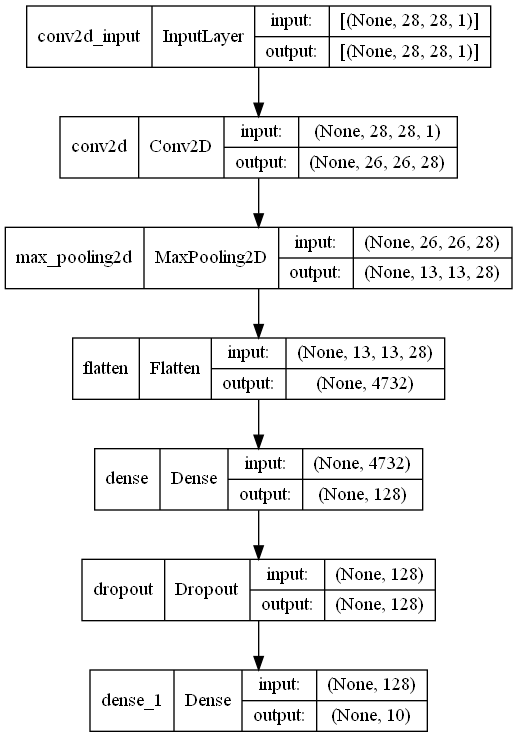

In [4]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.png', show_shapes= True)
Image("model.png")


In [22]:
plt.figure(1)
plt.plot(sonuc.history['acc'])
plt.title(' accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_model(model, to_file='model.png')